# Digit Identification

## 1. Importing Libaries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import csv

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import tensorflow as tf

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


## 2. Getting Data

In [2]:
#this lines are to import all the data needed
file=open('/kaggle/input/digit-recognizer/train.csv')
data=pd.read_csv(file)
data2=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
#data.head()
#data2.head()
x_train=np.array(data.iloc[:,1:].astype('float32')) 
y_train=np.array(data.iloc[:,0:1].astype('float32'))    
x_test=np.array(data2.iloc[:,:].astype('float32'))      
print(x_train.shape,y_train.shape,x_test.shape)

(42000, 784) (42000, 1) (28000, 784)


## 3. Preparing the Data

In [3]:
#all about getting the data ready

#turning y values into one hot matrix
y_train=to_categorical(y_train)

#normalizing x data values
x_train=x_train/255
x_test=x_test/255

#reshaping the images
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

#dividing into train and validation sets
seed=3
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=seed)

## 4. CNN

In [4]:
#now we set up our model
model=Sequential()

#adding 2 convolution layer of filter 32 followed by a pooloing layer and dropouts
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

#adding the above layers only this time with 64 filters
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

#creating a Dense layer with 256 units
model.add(Dense(256, activation = "relu"))

#another Dense layer with 10 unit i.e, 10 digits as output
model.add(Dense(10, activation = "softmax"))

#display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

## 5. Compile and Run

In [5]:
#compiling our model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

#fitting the data
records=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_val,y_val))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 28s 821us/step - loss: 0.2037 - accuracy: 0.9368 - val_loss: 0.0748 - val_accuracy: 0.9768
Epoch 2/10
33600/33600 [==============================] - 28s 819us/step - loss: 0.0584 - accuracy: 0.9825 - val_loss: 0.0570 - val_accuracy: 0.9817
Epoch 3/10
33600/33600 [==============================] - 27s 799us/step - loss: 0.0410 - accuracy: 0.9867 - val_loss: 0.0440 - val_accuracy: 0.9860
Epoch 4/10
33600/33600 [==============================] - 27s 817us/step - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.0468 - val_accuracy: 0.9845
Epoch 5/10
33600/33600 [==============================] - 27s 804us/step - loss: 0.0249 - accuracy: 0.9917 - val_loss: 0.0575 - val_accuracy: 0.9821
Epoch 6/10
33600/33600 [==============================] - 27s 814us/step - loss: 0.0217 - accuracy: 0.9932 - val_loss: 0.0476 - val_accuracy: 0.9856
Epoch 7/10
33600/33600 [==============================] -

## 6. Visualisation

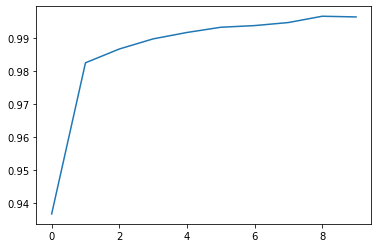

In [6]:
#here we will analyze our model with plots and results
accu_ratings=records.history['accuracy']
plt.plot(range(len(accu_ratings)),accu_ratings)
plt.show()


## 7. Predictions 

In [7]:
#finding the predictions for x_test
pred=model.predict(x_test)

#combining the one_hot matrix to numbers
pred=np.argmax(pred,axis=1)
print(pred)

[2 0 9 ... 3 9 2]


## 8. Results in File

In [8]:
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("results.csv",index=False)